# Gradient descent with fixed step size in contraction

This notebook provides the code for drawing worst-case performance of gradient descent in contraction, and comparing it to its theoretical guarantee. This code returns the figures from the paper [...].

More precisely, the following convex minimization problem is considered
\begin{equation}
f_\star \triangleq \min_x f(x),
\end{equation}
where $f$ is $L$-smooth and $\mu$-strongly convex.

The package PEPit allows to compute a worst-case guarantee for **gradient descent** with fixed step size $\gamma$. That is, it computes the smallest possible $\tau(n, L, \mu, \gamma)$ such that the following guarantee holds
\begin{equation}
\| x_n - y_n \|^2 \leqslant \tau(n, L, \mu, \gamma) \| x_0 - y_0 \|^2,
\end{equation}
where $x_n$and $y_n$ are the outputs of the gradient descent with fixed step size $\gamma$, starting respectively from $x_0$ and $y_0$.

Gradient descent with fixed step size $\gamma$may be described as follows, for $t \in \{0,1, \ldots, n-1\}$
\begin{equation}
x_{t+1} = x_t - \gamma \nabla f(x_t).
\end{equation}

The **tight** theoretical guarantee is 
\begin{equation}
\| x_n - y_n \|^2 \leqslant  \max\{(1-L\gamma)^2,(1-\mu \gamma)^2\}^n\| x_0 - y_0 \|^2,
\end{equation}
which is tight on simple quadratic functions.

## Imports

First, we include the right python imports, including commmon packages and the function returning worst-case performance of gradient descent in contraction.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import PEPit

# import gradient descent in contraction from the toolbox
import PEPit.examples.gradient_step_contraction as inGDC

# Set the verbose parameter to False to return worst-case without details
verbose = False

## 1.  Worst-case as a function of the iteration count

In [19]:
# Set the parameters

L = 1          # smoothness parameter
mu = 0.1       # strong-convexity parameter
gamma = 1 / L  # step size

# Set a list of iteration counter to test
ns = np.array([1, 2, 4, 6, 8, 10, 15])#, 20, 30, 40, 50])


# Compute worst-case and theoretical guarantee for each iteration count
pepit_taus = np.zeros(len(ns))
theoretical_taus = np.zeros(len(ns))
for i in range(len(ns)):
    pepit_taus[i], theoretical_taus[i] = inGDC.wc_gradient_descent_contraction(mu=mu, 
                                                                               L=L, 
                                                                               gamma=gamma, 
                                                                               n=ns[i], 
                                                                               verbose=verbose)

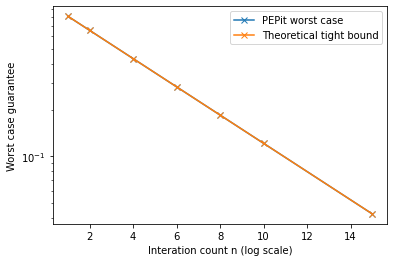

In [20]:
# Plot theoretical and PEPit worst-case performance as a function of the iteration count

plt.plot(ns, pepit_taus, label='PEPit worst case', marker='x')
plt.plot(ns, theoretical_taus, label='Theoretical tight bound', marker='x')

plt.semilogy()
plt.legend()
plt.xlabel('Interation count n (log scale)')
plt.ylabel('Worst case guarantee')

plt.show()

## 2. Worst-case performance as a function of the step size

In [14]:
# Set the parameters
n = 1      # iteration counter
L = 1      # smoothness parameter
mu = 0.1   # strong-convexity parameter

# Set a list of step sizes to test
gammas = np.linspace(0, 2 / L, 41)

# Compute worst-case and theoretical guarantee for step size
pepit_taus = np.zeros(len(gammas))
theoretical_taus = np.zeros(len(gammas))
for i in range(len(gammas)):
    pepit_taus[i], theoretical_taus[i] = inGDC.wc_gradient_descent_contraction(mu=mu, 
                                                                               L=L, 
                                                                               gamma=gammas[i], 
                                                                               n=n, 
                                                                               verbose=verbose)

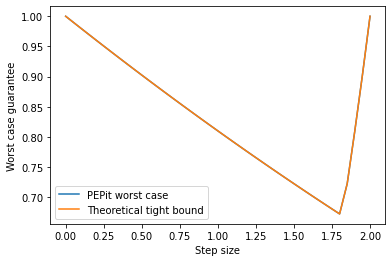

In [18]:
# Plot theoretical and PEPit worst-case performance as a function of the step size

plt.plot(gammas, pepit_taus, label='PEPit worst case')
plt.plot(gammas, theoretical_taus, label='Theoretical tight bound')

plt.legend()
plt.xlabel('Step size')
plt.ylabel('Worst case guarantee')

plt.show()